# 다섯번째 시도

Key Attempts:
- 감독, 배급사, 배우, 장르는 각 레이블의 관객수 중압값으로 치환
- 개봉월, 국가는 0,1 레이블 인코딩
- 감독, 배급사, 배우, 장르, 상영시간 normalise

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('./data/join_final_v5.csv', encoding='utf-8-sig', thousands=',')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   runTm        6806 non-null   int64 
 1   nation       6806 non-null   int64 
 2   genre        6806 non-null   int64 
 3   director     6806 non-null   object
 4   actor        6806 non-null   object
 5   is_adult     6806 non-null   int64 
 6   distributor  6806 non-null   object
 7   view         6806 non-null   int64 
 8   openMonth    6806 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 478.7+ KB


## 1. 메디안 값 치환

In [102]:
# 감독, 배우, 배급사 각각의 중앙 값 테이블 만들기
director = df.groupby('director').agg({"view":"median"}).reset_index()
actor = df.groupby('actor').agg({"view":"median"}).reset_index()
distributor = df.groupby('distributor').agg({"view":"median"}).reset_index()
genre = df.groupby('genre').agg({"view":"median"}).reset_index()

In [103]:
for idx, row in df.iterrows():
    act = row['actor']
    dist = row['distributor']
    dir = row['director']
    g = row['genre']

    a_val = actor[actor['actor'] == act]['view'].values[0]
    df.loc[idx, 'actor'] = a_val

    dist_val = distributor[distributor['distributor'] == dist]['view'].values[0]
    df.loc[idx, 'distributor'] = dist_val

    dir_val = director[director['director'] == dir]['view'].values[0]
    df.loc[idx, 'director'] = dir_val

    g_val = genre[genre['genre'] == g]['view'].values[0]
    df.loc[idx, 'genre'] = g_val

In [104]:
df.head()

,runTm,nation,genre,director,actor,is_adult,distributor,view,openMonth
0,136,2,13326.0,954845.5,167141.0,0,528537.0,1865469,7
1,119,3,148406.0,2674.0,17258.0,0,8048.0,24634,1
2,116,1,49803.5,6065474.0,3024666.0,1,708108.5,943241,4
3,125,2,13326.0,507938.5,58644.0,0,12057.0,85594,3
4,105,1,31655.0,193554.0,193554.0,0,356436.0,193554,6


In [108]:
distributor.sort_values('view', ascending=False).head(30)

,distributor,view
347,에스케이플래닛(주),2142670.0
334,아이러브시네마,1677571.5
2,(유)씨에이치엔터테인먼트,1544486.0
248,(주)해리슨앤컴퍼니,1360046.0
121,(주)스튜디오210,1112238.0
370,월트디즈니컴퍼니코리아 유한책임회사,969543.0
155,(주)에이스메이커무비웍스,878385.5
154,(주)에이비오엔터테인먼트,818930.0
87,(주)벤티지홀딩스,718560.5
108,(주)쇼박스,708108.5


## 2. 관객 수 범주형 변환

In [109]:
for idx, row in df.iterrows():
    val = row['view']
    if val <10000:
        df.loc[idx, 'view'] = 1
    elif val <100000:
        df.loc[idx, 'view'] = 2
    elif val <500000:
        df.loc[idx, 'view'] = 3
    elif val <1000000:
        df.loc[idx, 'view'] = 4
    elif val <3000000:
        df.loc[idx, 'view'] = 5
    elif val <7000000:
        df.loc[idx, 'view'] = 6
    elif val <10000000:
        df.loc[idx, 'view'] = 7
    else:
        df.loc[idx, 'view'] = 8

## 3. 라벨인코딩

In [110]:
y = df['view']
X = df.drop('view', axis=1)

In [111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   runTm        6806 non-null   int64  
 1   nation       6806 non-null   int64  
 2   genre        6806 non-null   float64
 3   director     6806 non-null   object 
 4   actor        6806 non-null   object 
 5   is_adult     6806 non-null   int64  
 6   distributor  6806 non-null   object 
 7   openMonth    6806 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 425.5+ KB


In [112]:
X = pd.get_dummies(data = X, columns=['nation'], prefix='region')

In [113]:
X = pd.get_dummies(data = X, columns=['openMonth'], prefix='month')

In [114]:
X.columns

Index(['runTm', 'genre', 'director', 'actor', 'is_adult', 'distributor',
       'region_1', 'region_2', 'region_3', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

## 4. 데이터 스플릿

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

## 5. Normalise

In [116]:
X_train

,runTm,genre,director,actor,is_adult,distributor,region_1,region_2,region_3,month_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1281,90,49803.5,126547.5,382104.5,0,276435.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4639,107,13326.0,176539.0,104424.5,0,173887.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6479,90,148406.0,5980.0,5980.0,0,8353.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6337,101,13326.0,6914.5,8193.0,0,5996.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
87,125,74600.5,180377.0,291163.0,1,430001.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4560,87,13326.0,5212.0,4159.0,0,3438.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2503,110,39946.5,471319.0,242603.0,0,430001.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2723,93,148406.0,102412.0,62954.0,0,6824.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5822,96,13326.0,49925.0,5920.0,0,6175.5,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [117]:
# train data의 runTm 컬럼만 normalisation fit 적용
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_train.iloc[:,0:6] = mm.fit_transform(X_train.iloc[:, 0:6])

In [118]:
X_train

,runTm,genre,director,actor,is_adult,distributor,region_1,region_2,region_3,month_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1281,0.213636,0.302650,0.011087,0.036993,0.0,0.128608,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4639,0.290909,0.044669,0.015502,0.010039,0.0,0.080725,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6479,0.213636,1.000000,0.000440,0.000483,0.0,0.003433,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6337,0.263636,0.044669,0.000522,0.000698,0.0,0.002333,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
87,0.372727,0.478023,0.015840,0.028166,1.0,0.200311,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4560,0.200000,0.044669,0.000372,0.000307,0.0,0.001138,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2503,0.304545,0.232938,0.041533,0.023452,0.0,0.200311,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2723,0.227273,1.000000,0.008956,0.006014,0.0,0.002719,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5822,0.240909,0.044669,0.004320,0.000478,0.0,0.002417,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [119]:
# test 데이터의 runTm 컬럼도 같은 minMax scaler transform
X_test.iloc[:,0:6] = mm.transform(X_test.iloc[:, 0:6])

## 6. Modelling

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_train = lr_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, lr_train))
print("test accuracy : ", accuracy_score(y_test, lr_pred))

train accuracy :  0.47103274559193953
test accuracy :  0.4544564152791381


In [121]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=8)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_train = dt_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, dt_train))
print("test accuracy : ", accuracy_score(y_test, dt_pred))

train accuracy :  0.8129722921914357
test accuracy :  0.747796278158668


Feature: runTm, Score: 0.02205
Feature: genre, Score: 0.00721
Feature: director, Score: 0.74438
Feature: actor, Score: 0.15981
Feature: is_adult, Score: 0.00463
Feature: distributor, Score: 0.04407
Feature: region_1, Score: 0.00115
Feature: region_2, Score: 0.00127
Feature: region_3, Score: 0.00000
Feature: month_1, Score: 0.00188
Feature: month_2, Score: 0.00074
Feature: month_3, Score: 0.00000
Feature: month_4, Score: 0.00184
Feature: month_5, Score: 0.00193
Feature: month_6, Score: 0.00000
Feature: month_7, Score: 0.00000
Feature: month_8, Score: 0.00121
Feature: month_9, Score: 0.00234
Feature: month_10, Score: 0.00175
Feature: month_11, Score: 0.00095
Feature: month_12, Score: 0.00278


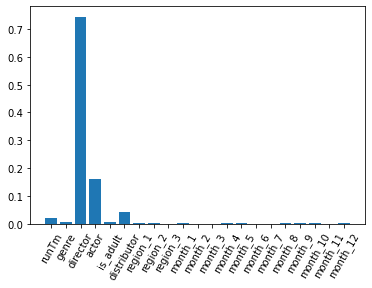

In [122]:
importance = dt_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

In [123]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_train = rf_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, rf_train))
print("test accuracy : ", accuracy_score(y_test, rf_pred))

train accuracy :  0.9997900923593619
test accuracy :  0.7433888344760039


Feature: runTm, Score: 0.09308
Feature: genre, Score: 0.04556
Feature: director, Score: 0.33158
Feature: actor, Score: 0.25183
Feature: is_adult, Score: 0.01257
Feature: distributor, Score: 0.14592
Feature: region_1, Score: 0.00828
Feature: region_2, Score: 0.00860
Feature: region_3, Score: 0.01262
Feature: month_1, Score: 0.00692
Feature: month_2, Score: 0.00811
Feature: month_3, Score: 0.00751
Feature: month_4, Score: 0.00754
Feature: month_5, Score: 0.00728
Feature: month_6, Score: 0.00617
Feature: month_7, Score: 0.00794
Feature: month_8, Score: 0.00734
Feature: month_9, Score: 0.00792
Feature: month_10, Score: 0.00779
Feature: month_11, Score: 0.00768
Feature: month_12, Score: 0.00776


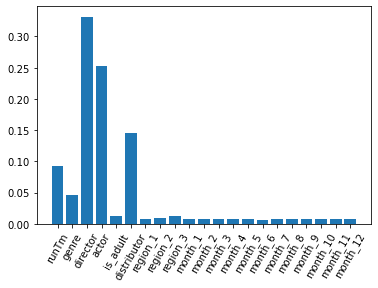

In [124]:
importance = rf_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

In [125]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000, num_leaves=64, boost_from_average = False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_train = rf_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, lgbm_train))
print("test accuracy : ", accuracy_score(y_test, lgbm_pred))

train accuracy :  0.9997900923593619
test accuracy :  0.738001958863859


Feature: runTm, Score: 36925.00000
Feature: genre, Score: 12930.00000
Feature: director, Score: 40845.00000
Feature: actor, Score: 42133.00000
Feature: is_adult, Score: 2177.00000
Feature: distributor, Score: 27538.00000
Feature: region_1, Score: 1885.00000
Feature: region_2, Score: 2450.00000
Feature: region_3, Score: 1570.00000
Feature: month_1, Score: 1012.00000
Feature: month_2, Score: 1188.00000
Feature: month_3, Score: 867.00000
Feature: month_4, Score: 1205.00000
Feature: month_5, Score: 928.00000
Feature: month_6, Score: 760.00000
Feature: month_7, Score: 1316.00000
Feature: month_8, Score: 1183.00000
Feature: month_9, Score: 881.00000
Feature: month_10, Score: 1070.00000
Feature: month_11, Score: 945.00000
Feature: month_12, Score: 1219.00000


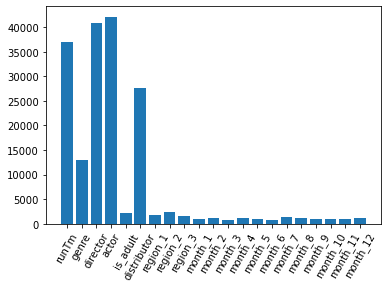

In [126]:
importance = lgbm_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

## 7. Boosting

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings

warnings.filterwarnings('ignore')

In [159]:
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=13, n_estimators=200, learning_rate=0.01, max_depth=4)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_train_pd = gb_clf.predict(X_train)

print("ACC : ", accuracy_score(y_test, gb_pred))
print("Fit time : ", time.time() - start_time)

ACC :  0.7556317335945152
Fit time :  18.40587592124939


In [160]:
print("Train Accuracy : ", accuracy_score(y_train, gb_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, gb_pred))

Train Accuracy :  0.8249370277078085
Test Accuracy :  0.7556317335945152


In [130]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 300],
    'learning_rate' : [0.01, 0.1]
}

start_time = time.time()
grid = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)
grid_train_pd = grid.predict(X_train)

print("ACC : ", accuracy_score(y_test, grid_pred))
print("Fit time : ", time.time() - start_time)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
ACC :  0.7502448579823702
Fit time :  43.58072280883789


In [131]:
print("Train Accuracy : ", accuracy_score(y_train, grid_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, grid_pred))

Train Accuracy :  0.8035264483627204
Test Accuracy :  0.7502448579823702


In [132]:
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

y_train_copy -= 1
y_test_copy -= 1

In [157]:
from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=4)
xgb.fit(X_train.values, y_train_copy.values)

print("Accuracy : ", accuracy_score(y_test_copy.values, xgb.predict(X_test.values)))
print('Fit time : ', time.time() - start_time)

Accuracy :  0.7541625857002938
Fit time :  5.25878381729126


In [158]:
print("Train Accuracy : ", accuracy_score(y_train_copy.values, xgb.predict(X_train.values)))
print("Test Accuracy : ", accuracy_score(y_test_copy.values, xgb.predict(X_test.values)))

Train Accuracy :  0.7991183879093199
Test Accuracy :  0.7541625857002938


In [135]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
abc = AdaBoostClassifier(n_estimators=200, base_estimator= dt_clf ,learning_rate=0.01)
abc.fit(X_train.values, y_train.values)
abc_pred = abc.predict(X_test)
abc_train_pd = abc.predict(X_train)

print("Accuracy : ", accuracy_score(y_test.values, abc_pred))
print('Fit time : ', time.time() - start_time)

Accuracy :  0.7291870714985309
Fit time :  5.054111003875732


In [136]:
print("Train Accuracy : ", accuracy_score(y_train, abc_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, abc_pred))

Train Accuracy :  0.9662048698572628
Test Accuracy :  0.7291870714985309


---

## 8. Conclusion

- 세번째 시도와의 차이점으로는 개봉 월을 중앙값 치환이 아닌 레이블 인코딩을 돌렸다.
- 개봉 월 자체가 중요한 feature가 아니어서 세번째와 다섯번째 시도에 뚜렸한 성능 차이는 보이지 않는다.

---

## 9. Prediction

### 9.1 데이터 불러오기

In [137]:
pred_df = pd.read_excel('./data/prediction_data.xlsx')

In [138]:
pred_df

,movieNmEn,runTm,nation,genre,director,actor,is_adult,distributor,openMonth
0,Into the Wild,148,2,1,숀 펜,에밀 허쉬,0,NaN,NaN
1,Superbad,113,2,5,그렉 모톨라,조나 힐,1,NaN,NaN
2,Zombieland,88,2,5,루벤 플레셔,우디 해럴슨,1,NaN,NaN
3,Shaun of the Dead,99,3,5,에드가 라이트,사이먼 페그,1,NaN,NaN
4,21 Jump Street,109,2,2,필 로드,조나 힐,1,NaN,NaN
5,"Crazy, Stupid, Love.",118,2,5,글렌 피카라,스티브 카렐,0,NaN,NaN
6,Scott Pilgrim vs. the World,112,2,2,에드가 라이트,마이클 세라,0,NaN,NaN
7,Anchorman: The Legend of Ron Burgundy,94,2,5,아담 맥케이,윌 페렐,0,NaN,NaN
8,Serenity,119,2,1,스티븐 나이트,매튜 매커너히,0,NaN,NaN
9,Forgetting Sarah Marshall,111,2,5,니콜라스 스톨러,제이슨 세걸,1,NaN,NaN


### 9.2 레이블인코딩

In [139]:
pred_copy = pred_df.copy()

In [140]:
pred_copy = pd.get_dummies(data = pred_copy, columns=['nation'], prefix='region')

In [141]:
# 1 = 한국이란 값이 예측 데이터에는 없기에, 0값으로 추가
pred_copy['region_1'] = 0

In [142]:
pred_copy = pred_copy.drop(["movieNmEn", "openMonth"], axis=1)

In [143]:
pred_copy[['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']] = 0

In [144]:
# 위의 학습 데이터와 컬럼 순서를 같게 만들어주기
pred_copy = pred_copy.reindex(columns=['runTm', 'genre', 'director', 'actor', 'is_adult', 'distributor', 'region_1', 'region_2', 'region_3', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'])

In [145]:
pred_copy.columns

Index(['runTm', 'genre', 'director', 'actor', 'is_adult', 'distributor',
       'region_1', 'region_2', 'region_3', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

### 9.3 감독/배우/장르 중앙값 추가

In [146]:
# 기존에 학습 데이터에서 사용한 감독/배우 테이블에 해당 이름이 없으면 최소값인 1,001로 입력
for idx, row in pred_copy.iterrows():
    act = row['actor']
    dir = row['director']
    g = row['genre']

    try:
        a_val = actor[actor['actor'] == act]['view'].values[0]
    except:
        a_val = 1001
    
    try:
        dir_val = director[director['director'] == dir]['view'].values[0]
    except:
        dir_val = 1001
    
    pred_copy.loc[idx, 'actor'] = a_val
    pred_copy.loc[idx, 'director'] = dir_val

    g_val = genre[genre['genre'] == g]['view'].values[0]
    pred_copy.loc[idx, 'genre'] = g_val

### 9.4 배급사 중앙값, 개봉 월 추가

In [147]:
distributor.sort_values('view', ascending=False).head(10)

,distributor,view
347,에스케이플래닛(주),2142670.0
334,아이러브시네마,1677571.5
2,(유)씨에이치엔터테인먼트,1544486.0
248,(주)해리슨앤컴퍼니,1360046.0
121,(주)스튜디오210,1112238.0
370,월트디즈니컴퍼니코리아 유한책임회사,969543.0
155,(주)에이스메이커무비웍스,878385.5
154,(주)에이비오엔터테인먼트,818930.0
87,(주)벤티지홀딩스,718560.5
108,(주)쇼박스,708108.5


In [148]:
# 배급사는 해리슨앤컴퍼니, 개봉월은 4월 임의로 지정
pred_copy['distributor'] = 1360046.0
pred_copy['month_4'] = 1

In [149]:
pred_copy.head()

,runTm,genre,director,actor,is_adult,distributor,region_1,region_2,region_3,month_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,148,13326.0,1001,93086.5,0,1360046.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,113,31655.0,61808.0,641323.0,1,1360046.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,88,31655.0,2012489.5,113795.0,1,1360046.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,99,31655.0,85165.0,85165.0,1,1360046.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,109,148406.0,655078.0,641323.0,1,1360046.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


### 9.5 Normalisation

In [150]:
pred_copy.iloc[:,0:6] = mm.transform(pred_copy.iloc[:, 0:6])

### 9.6 예측 관객수

In [151]:
xgb_prediction = xgb.predict(pred_copy.values)
gb_prediction = gb_clf.predict(pred_copy)

In [152]:
xgb_prediction += 1

In [153]:
pred_copy['xgb_pred'] = xgb_prediction
pred_copy['gb_pred'] = gb_prediction

In [154]:
pred_df['xgb_pred'] = xgb_prediction
pred_df['gb_pred'] = gb_prediction

In [155]:
pred_df['distributor'] = '(주)해리슨앤컴퍼니'
pred_df['openMonth'] = 4

In [156]:
pred_df

,movieNmEn,runTm,nation,genre,director,actor,is_adult,distributor,openMonth,xgb_pred,gb_pred
0,Into the Wild,148,2,1,숀 펜,에밀 허쉬,0,(주)해리슨앤컴퍼니,4,1,1
1,Superbad,113,2,5,그렉 모톨라,조나 힐,1,(주)해리슨앤컴퍼니,4,2,2
2,Zombieland,88,2,5,루벤 플레셔,우디 해럴슨,1,(주)해리슨앤컴퍼니,4,5,3
3,Shaun of the Dead,99,3,5,에드가 라이트,사이먼 페그,1,(주)해리슨앤컴퍼니,4,2,2
4,21 Jump Street,109,2,2,필 로드,조나 힐,1,(주)해리슨앤컴퍼니,4,4,4
5,"Crazy, Stupid, Love.",118,2,5,글렌 피카라,스티브 카렐,0,(주)해리슨앤컴퍼니,4,2,2
6,Scott Pilgrim vs. the World,112,2,2,에드가 라이트,마이클 세라,0,(주)해리슨앤컴퍼니,4,1,1
7,Anchorman: The Legend of Ron Burgundy,94,2,5,아담 맥케이,윌 페렐,0,(주)해리슨앤컴퍼니,4,3,3
8,Serenity,119,2,1,스티븐 나이트,매튜 매커너히,0,(주)해리슨앤컴퍼니,4,1,1
9,Forgetting Sarah Marshall,111,2,5,니콜라스 스톨러,제이슨 세걸,1,(주)해리슨앤컴퍼니,4,3,1


---